<a href="https://colab.research.google.com/github/iantonellaaa/StarCraft/blob/main/StarCraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?id=1yDiPabrhY3LMN0pV9bWgTEYwr6Wfzu14
" width="500"/>

<div style="text-align: center;">
  <img src="https://www.pngall.com/wp-content/uploads/11/Starcraft-Logo-PNG-Photos.png">
</div>

### Evaluación Parcial N°1

Integrantes: Daysi Vejar

Docente: Emilio Soto

Sección: 003D

### Contexto del caso

StarCraft II es un juego de estrategia en tiempo real (RTS) desarrollado por Blizzard Entertainment. Lanzado en 2010, es la secuela del icónico StarCraft original. El juego se ambienta en un futuro distante, donde tres facciones, los humanos terran, los enjambres zerg y los misteriosos protoss, luchan por el control del sector Koprulu. Los jugadores pueden elegir una de las tres razas, cada una con habilidades únicas y estrategias distintas. StarCraft II presenta una campaña envolvente con una narrativa rica y desafiantes misiones para cada raza. Además, destaca en el ámbito multijugador, donde jugadores de todo el mundo compiten en emocionantes batallas. El juego ha alcanzado un estatus destacado en los deportes electrónicos (eSports), con una comunidad activa y competiciones de alto nivel. La gestión de recursos, la toma de decisiones estratégicas y la velocidad de ejecución son fundamentales en StarCraft II, lo que lo convierte en un desafío constante. Con gráficos impresionantes, una jugabilidad sólida y una escena competitiva vibrante, StarCraft II sigue siendo una referencia en el mundo de los juegos de estrategia en tiempo real.

$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Variable } & \text { Descripción } \\
\hline {GameID} & \text {Unique ID for each game }  \\
\hline \text{ LeagueIndex} & \text { 1-8 for Bronze, Silver, Gold, Diamond, Master, GrandMaster, Professional leagues} \\
\hline \text{ Age} & \text { Age of each player } \\
\hline \text{ HoursPerWeek} & \text { Hours spent playing per week } \\
\hline \text{ TotalHours} & \text { Total hours spent playing } \\
\hline \text{ APM} & \text { Action per minute } \\
\hline \text{ SelectByHotkeys} & \text { Number of unit selections made using hotkeys per timestamp} \\
\hline \text{ AssignToHotkeys} & \text { Number of units assigned to hotkeys per timestamp} \\
\hline \text{ MinimapAttacks} & \text {  Number of attack actions on minimal per timestamp} \\
\hline \text{ MinimapRightClicks} & \text {  Number of right-clicks on minimal per timestamp} \\
\hline \text{ NumberOfPACs} & \text { Number of PACs per timestamp} \\
\hline \text{ GapBetweenPACs} & \text { Mean duration between PACs (milliseconds)} \\
\hline \text{ ActionLatency} & \text {  Mean latency from the onset of PACs to their first action (milliseconds)} \\
\hline \text{ ActionsInPAC} & \text {  Mean number of actions within each PAC } \\
\hline \text{ TotalMapExplored} & \text { Number of 24x24 game coordinate grids viewed by player per timestamp} \\
\hline \text{ WorkersMade} & \text {Number of SCVs, drones, probes trained per timestamp} \\
\hline \text{ UniqueUnitsMade} & \text { Unique units made per timestamp } \\
\hline \text{ ComplexUnitsMade} & \text { Number of ghosts, investors, and high templars trained per timestamp } \\
\hline \text{ ComplexAbilityUsed} & \text {Abilities requiring specific targeting instructions used per timestamp} \\
\hline \text{ MaxTimeStamp} & \text { Time stamp of game's last recorded event} \\
\hline
\end{array}
\end{aligned}
$$


### Fase 1: Business Understanding

Importación de librerías

In [ ]:
# Importamos librerías
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [ ]:
# Leemos el archivo CSV llamado 'starcraft_duoc.csv' en un DataFrame de pandas 'df, y en la opción low_memory=False es para evitar una pérdida de datos
df = pd.read_csv('starcraft_duoc.csv',sep=';', low_memory=False)

# Aqui nos mostrara las primeras 5 filas del DataFrame
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143.718,0.003515159,0.000219697,0.000109849,0.000392317,0.004849,326.677,408.673,47.508,0.000220,0.0013966,4.71e-05,0,0,127448
1,55,5,23.0,10.0,5000.0,1.292.322,0.003303812,0.000259462,0.000294057,0.000432436,0.004307,329.194,423.454,48.434,0.000381,0.0011935,8.65e-05,0,0.00020757,57812
2,56,4,30.0,10.0,200.0,699.612,0.001101091,0.00033557,0.000293624,0.000461409,0.002926,446.475,753.548,4.043,0.000231,0.00074455,6.29e-05,0,0.00018876,95360
3,57,3,19.0,20.0,400.0,1.076.016,0.001033542,0.000213101,5.33e-05,0.000543409,0.003783,292.203,537.352,49.155,0.000202,0.0004262,7.46e-05,0,0.00038358,93852
4,58,3,32.0,10.0,500.0,1.228.908,0.001136014,0.000327326,0,0.001328558,0.002368,226.885,620.813,9.374,0.000289,0.0011745,7.7e-05,0,1.93e-05,51936


Bajo el enfoque del modelo CRISP-DM, la comprensión del contexto del negocio se convierte en un elemento esencial tanto para el análisis de datos como para la identificación de los aspectos críticos dentro del ámbito de estudio en este caso de análisis de datos relacionados con el rendimiento de los jugadores en un juego en línea.

En el contexto específico del juego en línea, se nos proporciona una orientación general que abarca una descripción detallada de las variables, sus posibles transformaciones, los valores que pueden tomar y sus respectivas explicaciones. Todo esto se realiza con el objetivo de proporcionar una visión más clara y completa de los datos que serán objeto de análisis. Además, esta información nos permite visualizar las posibles relaciones entre las variables, sentando las bases para un análisis y modelado posteriores.

La descripción general de los datos también desempeña un papel fundamental al proporcionarnos pistas y suposiciones valiosas, lo que a su vez nos permite formular hipótesis sólidas. Estas hipótesis se convierten en el punto de partida para anticipar las posibles predicciones que podríamos generar mediante el análisis y modelado de este conjunto de datos, lo que resulta crucial en el contexto del juego en línea para entender mejor el rendimiento de los jugadores y cómo mejorar su experiencia de juego.

#### Hipotesis / Kpi
1. **Rendimiento del jugador en función de la experiencia y la práctica:** Podemos analizar cómo la edad y las horas dedicadas a jugar impactan en el rendimiento de los jugadores, medido por el Action per Minute **(APM)**.

2. **Patrones de juego basados en la liga del jugador:** Podemos analizar si existen diferencias significativas en el estilo de juego entre jugadores de diferentes ligas **(Bronze, Silver, Gold, etc.)**, utilizando variables como APM, selección de unidades mediante hotkeys y acciones en el minimapa.

3. **Relación entre la experiencia total y el rendimiento del jugador:** Podemos explorar cómo la experiencia total de juego de un jugador se relaciona con su rendimiento en términos de APM, asignación de hotkeys y acciones de minimapa, entre otros.

4. **Efecto del tiempo de juego por semana en el rendimiento:** Podríamos investigar si el número de horas que un jugador dedica al juego por semana afecta su APM, selección de unidades y otras métricas de desempeño.

5. **Evolución del rendimiento durante una partida:** Podemos analizar cómo evolucionan las métricas de rendimiento a lo largo del tiempo dentro de una partida, utilizando variables como el Gap Between PACs, Action Latency y Actions In PAC.

Estas hipótesis nos proporcionan puntos de partida para explorar y analizar los datos disponibles, lo que nos permitirá generar insights útiles para comprender mejor el juego y el rendimiento de los jugadores en él.

### Fase 2: Data Understanding

#### 1. Visión General de los datos

In [ ]:
# Estructura de los datos
df

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143.718,0.003515159,0.000219697,0.000109849,0.000392317,0.004849,326.677,408.673,47.508,0.000220,0.0013966,4.71e-05,0,0,127448
1,55,5,23.0,10.0,5000.0,1.292.322,0.003303812,0.000259462,0.000294057,0.000432436,0.004307,329.194,423.454,48.434,0.000381,0.0011935,8.65e-05,0,0.00020757,57812
2,56,4,30.0,10.0,200.0,699.612,0.001101091,0.00033557,0.000293624,0.000461409,0.002926,446.475,753.548,4.043,0.000231,0.00074455,6.29e-05,0,0.00018876,95360
3,57,3,19.0,20.0,400.0,1.076.016,0.001033542,0.000213101,5.33e-05,0.000543409,0.003783,292.203,537.352,49.155,0.000202,0.0004262,7.46e-05,0,0.00038358,93852
4,58,3,32.0,10.0,500.0,1.228.908,0.001136014,0.000327326,0,0.001328558,0.002368,226.885,620.813,9.374,0.000289,0.0011745,7.7e-05,0,1.93e-05,51936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,NaN,NaN,NaN,2.596.296,0.020425314,0.00074296,0.000621163,0.000146156,0.004555,186.059,428.342,62.754,0.000560,0.00087694,6.09e-05,0,0,82104
3391,10090,8,NaN,NaN,NaN,314.67,0.028043136,0.001157179,0.000246208,0.001083317,0.004259,143.023,361.156,71.965,0.000394,0.00078787,9.85e-05,0,0,40616
3392,10092,8,NaN,NaN,NaN,2.994.282,0.028341014,0.000860215,0.000337942,0.000168971,0.004439,124.028,395.156,63.979,0.000292,0.0012596,6.14e-05,0,0,65100
3393,10094,8,NaN,NaN,NaN,3.758.664,0.036435894,0.000594265,0.000204279,0.000779973,0.004346,11.691,348.547,79.615,0.000279,0.00061284,0.000111425,0,0.00063141,53848


Podemos ver que el dataset consta de **20 columnas** y **3395 filas**

#### 2. Análisis estadistico

Realizamos un analisis estadistico de todas las columnas

In [ ]:
# Analisis estadistico de todas las columnas numericas y no numericas del dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
GameID,3395.0,NaN,NaN,NaN,4805.012371,2719.944851,52.0,2464.5,4874.0,7108.5,10095.0
LeagueIndex,3395.0,NaN,NaN,NaN,4.184094,1.517327,1.0,3.0,4.0,5.0,8.0
Age,3340.0,NaN,NaN,NaN,21.647904,4.206341,16.0,19.0,21.0,24.0,44.0
HoursPerWeek,3339.0,NaN,NaN,NaN,15.910752,11.962912,0.0,8.0,12.0,20.0,168.0
TotalHours,3338.0,NaN,NaN,NaN,960.421809,17318.133922,3.0,300.0,500.0,800.0,1000000.0
APM,3395,3374,143.718,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SelectByHotkeys,3395,3373,0,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AssignToHotkeys,3395,3306,0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinimapAttacks,3395,1728,0,877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinimapRightClicks,3395,3159,0,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Análisis
A simple vista se ve que todas las columnas del data set tienen valores numericos, para ratificar esto realizaremos una vista al tipo de datos de las columnas

#### 3. Tipos de datos

In [ ]:
# Información de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GameID              3395 non-null   int64  
 1   LeagueIndex         3395 non-null   int64  
 2   Age                 3340 non-null   float64
 3   HoursPerWeek        3339 non-null   float64
 4   TotalHours          3338 non-null   float64
 5   APM                 3395 non-null   object 
 6   SelectByHotkeys     3395 non-null   object 
 7   AssignToHotkeys     3395 non-null   object 
 8   MinimapAttacks      3395 non-null   object 
 9   MinimapRightClicks  3395 non-null   object 
 10  NumberOfPACs        3395 non-null   float64
 11  GapBetweenPACs      3395 non-null   object 
 12  ActionLatency       3395 non-null   object 
 13  ActionsInPAC        3395 non-null   float64
 14  TotalMapExplored    3395 non-null   float64
 15  WorkersMade         3395 non-null   object 
 16  Unique

##### Gráfico por tipo de datos

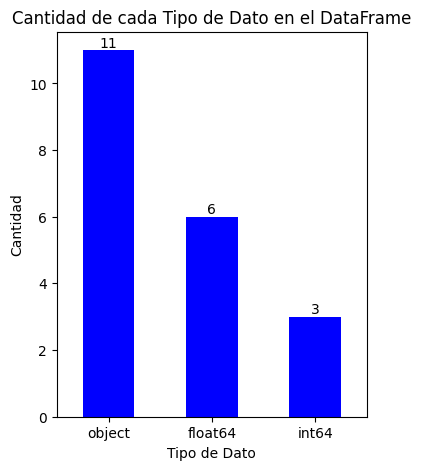

In [ ]:
# Se tiene el número de las columnas y lo almacenamos en la variable types
types = df.dtypes.value_counts()
# Se crea la barra azul
plt.figure(figsize=(4, 5))
ax = types.plot(kind='bar', rot=0, color='blue')

# Agregamos las anotaciones con los valores numéricos arriba de cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Agregamos las etiquetas y un título al gráfico
plt.xlabel('Tipo de Dato')
plt.ylabel('Cantidad')
plt.title('Cantidad de cada Tipo de Dato en el DataFrame')
plt.show()

##### Análisis

Se observan **11** columnas que se consideran tipo object asi que realizaremos un análisis más exhaustivo


#### 4. Análisis tipo Object

Crearemos una lista de las columnas de tipo object

In [ ]:
# Filtramos las columnas de tipo 'object'
object_columns = df.select_dtypes(include=['object'])
object_columns_list = object_columns.columns.to_list()
object_columns_list


['APM',
 'SelectByHotkeys',
 'AssignToHotkeys',
 'MinimapAttacks',
 'MinimapRightClicks',
 'GapBetweenPACs',
 'ActionLatency',
 'WorkersMade',
 'UniqueUnitsMade',
 'ComplexUnitsMade',
 'ComplexAbilityUsed']

Veremos la información que poseen las columnas object

In [ ]:
# Aqui mostramos las 20 filas
df[object_columns_list].sample(20)

,APM,SelectByHotkeys,AssignToHotkeys,MinimapAttacks,MinimapRightClicks,GapBetweenPACs,ActionLatency,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed
614,150.627,0.003409947,0.000244913,0.000113037,0.000226074,319.602,372.781,0.00089488,8.48e-05,1.88e-05,0
2548,1.636.314,0.008609039,0.000527084,0.000378419,0.000297329,297.169,421.019,0.00095956,6.76e-05,0,0
1467,1.048.044,0.002824165,0.00024558,0,0.000785855,42.4,776.981,0.00088409,0.00012279,0,0
1646,1.354.632,0.009309513,0.000263832,1.88e-05,0.000320368,435.957,517.672,0.00065958,5.65e-05,0,0
2888,770.478,0.001608814,0.000195008,0,9.75e-05,389.398,616.766,0.0011944,0.00012188,0,0.00014626
3211,2.173.608,0.02611465,0.000451168,2.65e-05,0.000504246,367.143,68.354,0.00066348,7.96e-05,0,0.00021231
2879,1.198.326,0.003110372,0.000123183,0,0.000107785,245.182,526.613,0.0016322,7.7e-05,0.000384947,0.00046194
3056,1.294.314,0.001585359,0.000194693,0.000194693,0.000445013,330.458,498.502,0.00087612,5.56e-05,0,0
2433,906.162,0.002398789,9.56e-05,2.39e-05,0.000541919,541.913,590.369,0.0004941,6.38e-05,0,0
2786,48.879,0.000400282,0.00025618,4.8e-05,8.01e-05,55.973,1.050.201,0.0007045,9.61e-05,9.61e-05,3.2e-05


Notamos que todas son numericas, asi que vemos los tipos de dato que tiene cada columna

In [ ]:
for col in object_columns_list:
    print(f'{df[col].apply(type).value_counts()}')

APM
<class 'str'>    3395
Name: count, dtype: int64
SelectByHotkeys
<class 'str'>    3395
Name: count, dtype: int64
AssignToHotkeys
<class 'str'>    3395
Name: count, dtype: int64
MinimapAttacks
<class 'str'>    3395
Name: count, dtype: int64
MinimapRightClicks
<class 'str'>    3395
Name: count, dtype: int64
GapBetweenPACs
<class 'str'>    3395
Name: count, dtype: int64
ActionLatency
<class 'str'>    3395
Name: count, dtype: int64
WorkersMade
<class 'str'>    3395
Name: count, dtype: int64
UniqueUnitsMade
<class 'str'>    3395
Name: count, dtype: int64
ComplexUnitsMade
<class 'str'>    3395
Name: count, dtype: int64
ComplexAbilityUsed
<class 'str'>    3395
Name: count, dtype: int64


##### Análisis

Se puede observar que las columnas objects tienen números tanto enteros como decimales, pero estos estan guardados como string.

**Recomendación:** Se recomienda tratar todos los datos de las columnas object *object_columns_list*  y transformarlas a tipo float

#### 5. Determinamos la cantidad de datos nulos del DataSet

Columnas con valores nulos

In [ ]:
# Número de valores nulos en cada columna
null_counts = df.isnull().sum()

# Filtramos la lista para solo tener las columnas que tengan al menos un valor nulo
# Ordenamos las columnas de manera descendente
null_counts = null_counts[null_counts > 0].sort_values(ascending=False).head()
null_counts

TotalHours      57
HoursPerWeek    56
Age             55
dtype: int64

Columnas con valores nulos en relación al total de columnnas

In [ ]:
# Calculamos el porcentaje con valores nulos, al menos tenga un valor nulo, ordenando las columnas de menor a mayor porcentaje
# Por ejemplo, si una columna tiene 10 valores nulos en un DataFrame con 100 filas, el porcentaje de valores nulos para esa columna sería 10%
null_counts[null_counts > 0].sort_values(ascending=True) / df.shape[0] * 100

Age             1.620029
HoursPerWeek    1.649485
TotalHours      1.678940
dtype: float64

**Recomendación:** Ya que los valores nulos equivalen a menos del **1.7%** del total, se pueden imputar por la media **(recomendado)** o eliminar **(no recomendado)**

#### Aclaracion

Se realizará en esta parte la imputación de datos y corrección de nulos de la fase 3, ya que con tantas columnas object no es factible realizar buenos análisis

1. Imputación Nulos
2. Paso a tipo float

In [ ]:
# 1. Imputacion de valores Nulos

# Calcula el valor medio de cada columna
mean_hours_per_week = df['HoursPerWeek'].mean()
mean_total_hours = df['TotalHours'].mean()

# Imputa los valores medios en las columnas faltantes
df['HoursPerWeek'].fillna(mean_hours_per_week, inplace=True)
df['TotalHours'].fillna(mean_total_hours, inplace=True)

# Calcula la moda de la columna Age
mode_age = df['Age'].mode()[0]  # El [0] es para obtener el valor en lugar de la Serie

# Llena los valores faltantes en la columna Age con la moda
df['Age'].fillna(mode_age, inplace=True)

# Verificamos que los valores faltantes se hayan llenado correctamente
print("Valores faltantes después de la imputación:")
print(df.isnull().sum().sum())

# 2. Lista de columnas que se convertirán a tipos numéricos
columns_to_convert = ['APM', 'SelectByHotkeys', 'AssignToHotkeys', 'MinimapAttacks',
                      'MinimapRightClicks', 'GapBetweenPACs', 'ActionLatency',
                      'WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilityUsed']

# Convierte las columnas a tipos numéricos
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Verifica los tipos de datos después de la conversión
print(df.dtypes)

Valores faltantes después de la imputación:
0
GameID                  int64
LeagueIndex             int64
Age                   float64
HoursPerWeek          float64
TotalHours            float64
APM                   float64
SelectByHotkeys       float64
AssignToHotkeys       float64
MinimapAttacks        float64
MinimapRightClicks    float64
NumberOfPACs          float64
GapBetweenPACs        float64
ActionLatency         float64
ActionsInPAC          float64
TotalMapExplored      float64
WorkersMade           float64
UniqueUnitsMade       float64
ComplexUnitsMade      float64
ComplexAbilityUsed    float64
MaxTimeStamp            int64
dtype: object


#### 6. Distribución de jugadores en diferentes ligas

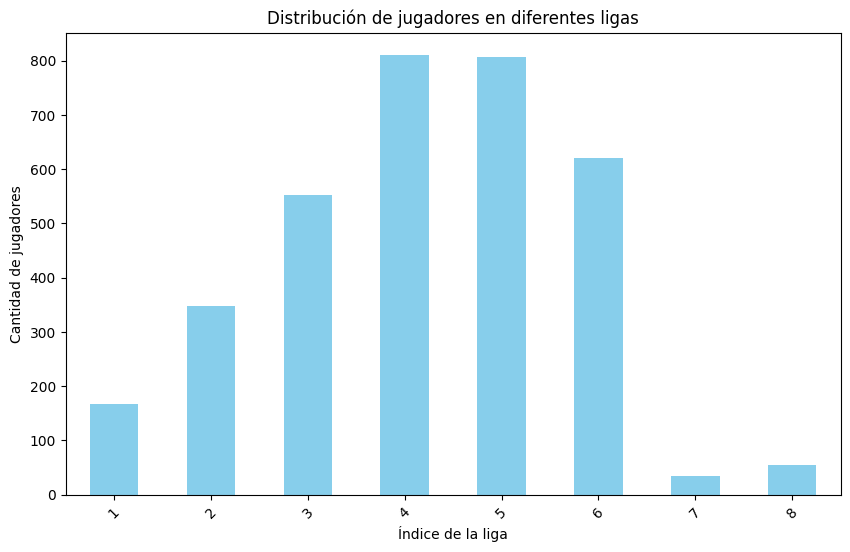

In [ ]:
# Gráfico de barras para la distribución de jugadores en diferentes ligas (LeagueIndex)
plt.figure(figsize=(10, 6))
df['LeagueIndex'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribución de jugadores en diferentes ligas')
plt.xlabel('Índice de la liga')
plt.ylabel('Cantidad de jugadores')
plt.xticks(rotation=45)
plt.show()

Se puede observar que la mayoria de los jugadores se encuentran en las ligas **4 & 5** y que muy pocos alcanzan los niveles más elevados en la clasificación, en relación a los KPIs seleccionados se deberá observar un gran salto en los valores de APM en los niveles **7 & 8** de la clasificación

#### 7. Distribución de edades de los jugadores

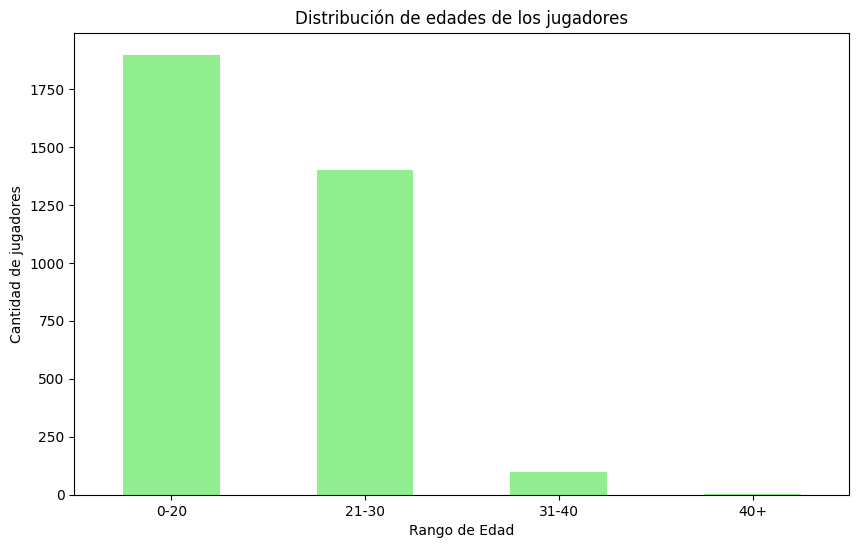

In [ ]:
# Agrupar las edades en rangos y crear un gráfico de barras para mostrar la distribución de edades de los jugadores
# Definir los límites de los rangos de edad
age_bins = [0, 21, 31, 41, float('inf')]  # Definir los límites de los rangos de edad

# Crear una nueva columna en el DataFrame que contenga los rangos de edad
df_Age_Group = pd.cut(df['Age'], bins=age_bins, labels=['0-20', '21-30', '31-40', '40+'])

# Contar la cantidad de jugadores en cada grupo de edad
age_group_counts = df_Age_Group.value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribución de edades de los jugadores')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de jugadores')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para que sean legibles
plt.show()

Se puede observar que a medida que la edad de los jugadores sube la cantidad dismunuye, esto tambien debería influir en las horas jugadas a la semana

#### 8. Horas a la semana jugadas por los jugadores

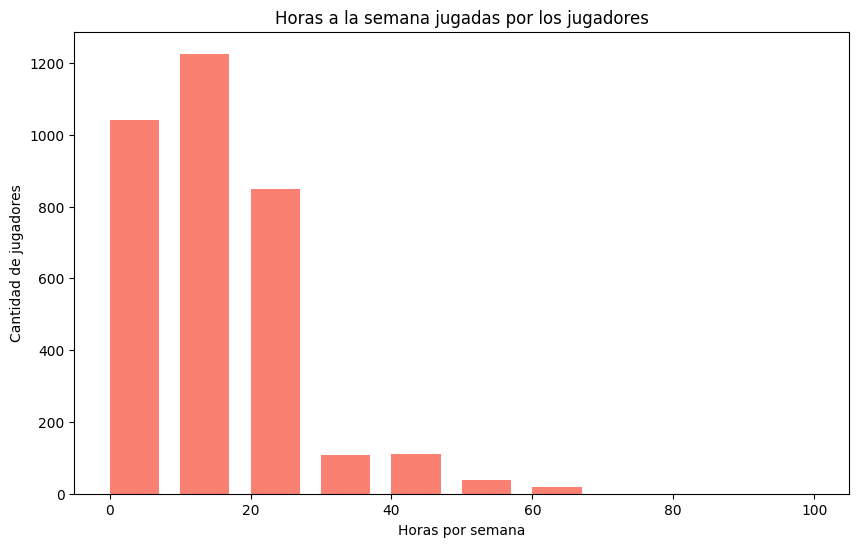

In [ ]:
# Gráfico de barras para mostrar cuántas horas a la semana juegan los jugadores en diferentes rangos de tiempo
plt.figure(figsize=(10, 6))
hours_bins = [0, 10, 20, 30, 40, 50, 60, 100]  # Definir los límites de los rangos de horas por semana
df['HoursPerWeek'].plot(kind='hist', bins=hours_bins, color='salmon', width=7)  # Ajuste el ancho de las barras
plt.title('Horas a la semana jugadas por los jugadores')
plt.xlabel('Horas por semana')
plt.ylabel('Cantidad de jugadores')
plt.show()

Se puede ver que la mayoria de los jugadores juegan como menos de 30 horas a la semana, acá debería observarse lo siguiente en las siguientes fases:

1. A mayor rango, mayor cantidad de horas jugadas
2. La mayoria de los jugadores que juegan 30 o más horas deben ser personas jovenes

#### 9. Distribución de las habilidades de los jugadores en términos de APM

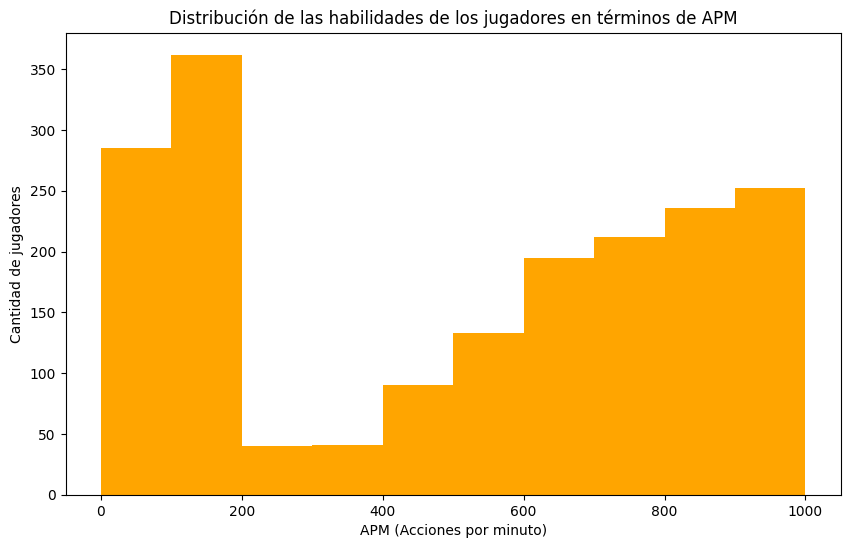

In [ ]:
# Agrupar las tasas de APM en rangos y mostrar la distribución de las habilidades de los jugadores en términos de APM
plt.figure(figsize=(10, 6))
apm_bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]  # Definir los límites de los rangos de APM
df['APM'].plot(kind='hist', bins=apm_bins, color='orange')
plt.title('Distribución de las habilidades de los jugadores en términos de APM')
plt.xlabel('APM (Acciones por minuto)')
plt.ylabel('Cantidad de jugadores')
plt.show()

Se puede ver que muchos jugadores solo tienen entre 0 y 200 APM, quizas se deba a que llevan pocas horas de juegos y no conecen el funcionanmiento, y luego de ese raro comportamiento se ve que los jugadores aumentan sus APM de manera directamente proporcional

#### 10. Exploración del mapa por los jugadores

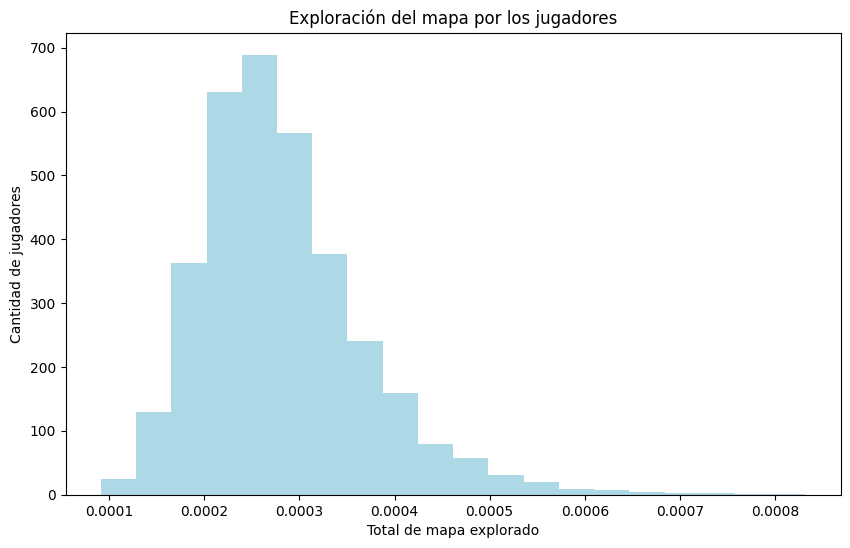

In [ ]:
# Gráfico de barras para comparar qué tan bien los jugadores exploran el mapa (TotalMapExplored)
plt.figure(figsize=(10, 6))
df['TotalMapExplored'].plot(kind='hist', bins=20, color='lightblue')
plt.title('Exploración del mapa por los jugadores')
plt.xlabel('Total de mapa explorado')
plt.ylabel('Cantidad de jugadores')
plt.show()

Podemos que ver que los datos se encuentrar en una distribución normal sesgada a la izquierda

#### 11. Outliers

Se realizar mediciones de outlieres para las variablesz *APM, TotalHours, Age, GapBetweenPACs, TotalMapExplored*, ya que estas variables nos ayudaran con los KPIs a trabajar

In [ ]:
# Sacar los valores atipicos de la columna APM, TotalMapExplored y TotalHours, age, gapbetweenPACs, para ver si hay valores atipicos sacando el 1.5 de la desviacion estandar y los cuartiles 25 y 75
# Lista de columnas a analizar llamada outliers_columns
outliers_columns = ['APM', 'TotalHours', 'Age', 'GapBetweenPACs','TotalMapExplored']

for col in outliers_columns:
    # Calcular los cuartiles 25 y 75
    q25 = df[col].quantile(0.25)
    q75 = df[col].quantile(0.75)

    # Calcular el rango intercuartílico
    iqr = q75 - q25

    # Calcular los límites inferior y superior

    lower_bound_15 = q25 - 1.5 * iqr
    upper_bound_15 = q75 + 1.5 * iqr

    # Filtrar los valores atípicos
    outliers_15 = df[(df[col] < lower_bound_15) | (df[col] > upper_bound_15)]

    # Calcular los límites inferior y superior pero con 3

    lower_bound_30 = q25 - 3 * iqr
    upper_bound_30 = q75 + 3 * iqr

    # Filtrar los valores atípicos
    outliers_30 = df[(df[col] < lower_bound_30) | (df[col] > upper_bound_30)]

    print(f'Columna {col}')
    print(f'Cuartil 25: {q25} y Cuartil 75: {q75}')
    print(f'{outliers_15.shape[0]} equivalente al {outliers_15.shape[0] / df.shape[0] * 100:.2f}% contando 1,5 rangos intercuartílicos')
    print(f'{outliers_30.shape[0]} equivalente al {outliers_30.shape[0] / df.shape[0] * 100:.2f}% contando 3 rangos intercuartílicos')
    print('-'*50)

Columna APM
Cuartil 25: 132.64124999999999 y Cuartil 75: 812.976
0 equivalente al 0.00% contando 1,5 rangos intercuartílicos
0 equivalente al 0.00% contando 3 rangos intercuartílicos
--------------------------------------------------
Columna TotalHours
Cuartil 25: 300.0 y Cuartil 75: 800.0
169 equivalente al 4.98% contando 1,5 rangos intercuartílicos
57 equivalente al 1.68% contando 3 rangos intercuartílicos
--------------------------------------------------
Columna Age
Cuartil 25: 19.0 y Cuartil 75: 24.0
98 equivalente al 2.89% contando 1,5 rangos intercuartílicos
9 equivalente al 0.27% contando 3 rangos intercuartílicos
--------------------------------------------------
Columna GapBetweenPACs
Cuartil 25: 248.147 y Cuartil 75: 461.27725
69 equivalente al 2.03% contando 1,5 rangos intercuartílicos
0 equivalente al 0.00% contando 3 rangos intercuartílicos
--------------------------------------------------
Columna TotalMapExplored
Cuartil 25: 0.000224364 y Cuartil 75: 0.000325256
107 equ

##### Gráfico de caja para los outliers

c:\Users\ccont\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ccont\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ccont\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ccont\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

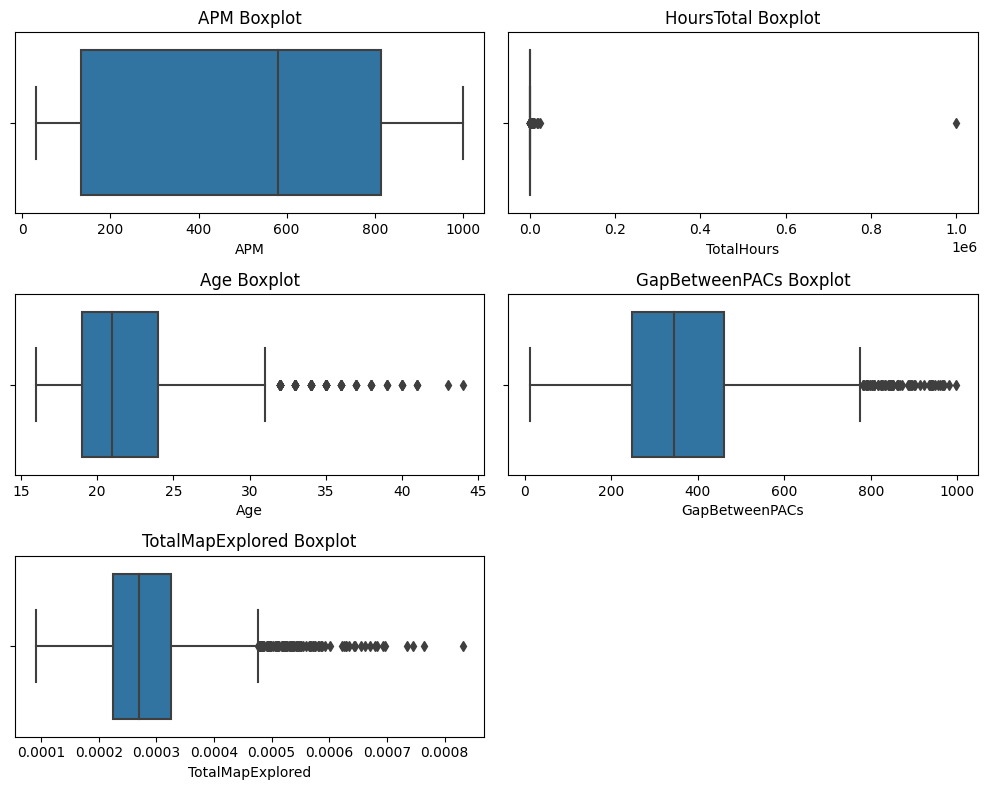

In [ ]:
# Aquí definimos el tamaño de la figura donde se mostrarán los gráficos
plt.figure(figsize=(10, 8))

# Boxplot para APM
plt.subplot(3, 2, 1) # 3 filas, 2 columnas, primer gráfico
sb.boxplot(x=df['APM'])
plt.title('APM Boxplot')

# Boxplot para HoursTotal
plt.subplot(3, 2, 2) # 3 filas, 2 columnas, segundo gráfico
sb.boxplot(x=df['TotalHours'])
plt.title('HoursTotal Boxplot')

# Boxplot para Age
plt.subplot(3, 2, 3) # 3 filas, 2 columnas, tercer gráfico
sb.boxplot(x=df['Age'])
plt.title('Age Boxplot')

# Boxplot para LeagueIndex
plt.subplot(3, 2, 4) # 3 filas, 2 columnas, cuarto gráfico
sb.boxplot(x=df['GapBetweenPACs'])
plt.title('GapBetweenPACs Boxplot')

# Boxplot para TotalMapExplored
plt.subplot(3, 2, 5) # 3 filas, 2 columnas, quinto gráfico
sb.boxplot(x=df['TotalMapExplored'])
plt.title('TotalMapExplored Boxplot')

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar los boxplots
plt.show()

**Recomendaciones:** Se recomienda eliminar los outiliers pero teniendo en cuenta 3 rangos intercuatilicos

#### 12. Mapa de correlación

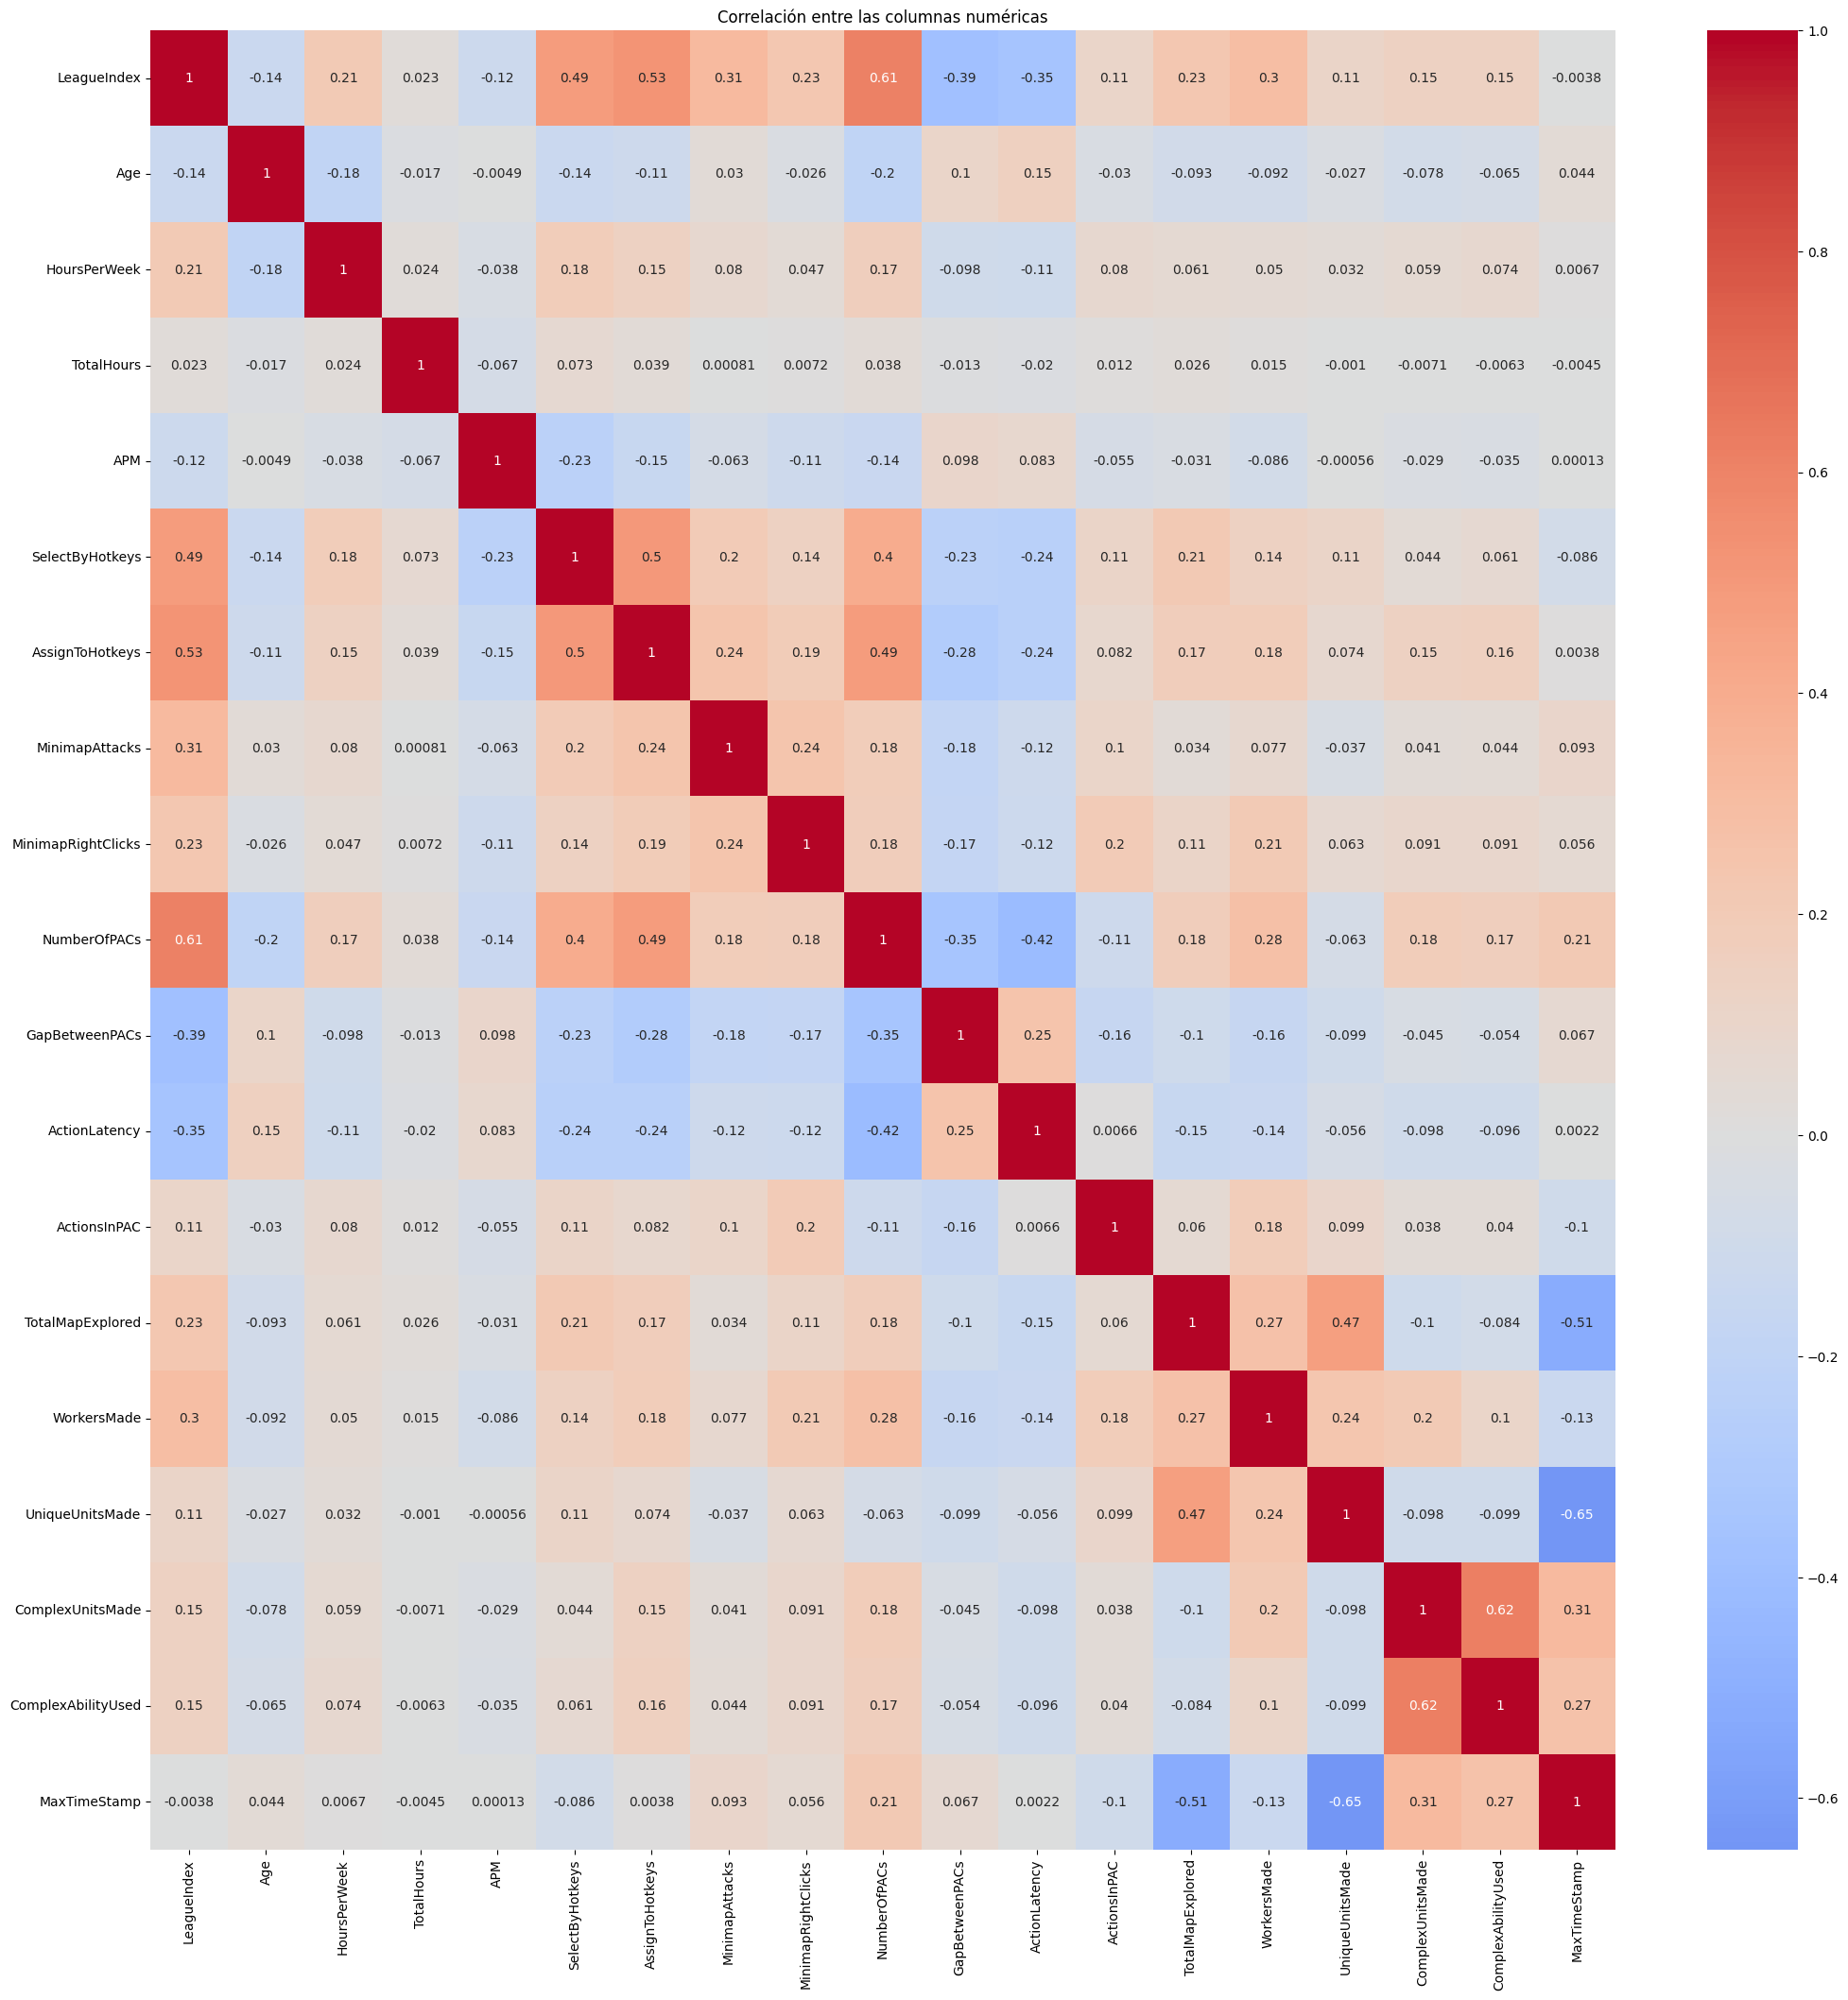

In [ ]:
# Realizar un grafico de correlacion de las columnas numericas
df_corr = df.drop(['GameID'], axis = 1)
plt.figure(figsize=(25, 25))
sb.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre las columnas numéricas')
plt.show()


Correlaciones superiores a 0.5 e inferiores a -0,5

In [ ]:
correlation_matrix = df_corr.corr()
correlation_matrix = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
correlation_matrix = correlation_matrix[correlation_matrix < 1.0]
correlation_matrix.dropna(axis=0, how='all', inplace=True)
correlation_matrix.dropna(axis=1, how='all', inplace=True)
correlation_matrix

,LeagueIndex,SelectByHotkeys,AssignToHotkeys,NumberOfPACs,TotalMapExplored,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
LeagueIndex,NaN,NaN,0.529499,0.612192,NaN,NaN,NaN,NaN,NaN
SelectByHotkeys,NaN,NaN,0.503515,NaN,NaN,NaN,NaN,NaN,NaN
AssignToHotkeys,0.529499,0.503515,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPACs,0.612192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalMapExplored,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.512077
UniqueUnitsMade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.646610
ComplexUnitsMade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.617158,NaN
ComplexAbilityUsed,NaN,NaN,NaN,NaN,NaN,NaN,0.617158,NaN,NaN
MaxTimeStamp,NaN,NaN,NaN,NaN,-0.512077,-0.64661,NaN,NaN,NaN


##### Análisis


1. Para el KPI *APM* con *Age* la correlación es **-0.0049**, lo que equivale a poca correlación
2. Para el KPI *APM* con *HoursPerWeek* la correlación es **-0.038** lo que equivale a poca correlación
3. Para el KPI *LeagueIndex* con *APM* la correlación es **-0.12** lo que equivale a poca correlación
4. Para el KPI *LeagueIndex* con *AssignToHotkeys* la correlación es **0.53** lo que equivale a una correlación media
5. Para el KPI *LeagueIndex* con *MinimapRightClicks* la correlación es **0.23** lo que equivale a poca correlación
6. Para el KPI *TotalHours* con *AssignToHotkeys* la correlación es **0.039** lo que equivale a poca correlación
7. Para el KPI *TotalHours* con *MinimapRightClicks* la correlación es **0.00081** lo que equivale a poca correlación

Por lo cual se recomienda cambiar los Kpi a alguno de estos:

1. Existe una correlación positiva entre *LeagueIndex y AssignToHotkeys*          del **0.529499**
2. Existe una correlación positiva entre *LeagueIndex y NumberOfPACs*             del **0.612192**
3. Existe una correlación positiva entre *SelectByHotkeys y AssignToHotkeys*      del **0.503515**
4. Existe una correlación positiva entre *ComplexAbilityUsed y ComplexUnitsMade*  del **0.617158**
5. Existe una correlación negativa entre *MaxTimeStamp y TotalMapExplored* del **-0.512077**
6. Existe una correlación negativa entre *MaxTimeStamp y UniqueUnitsMade* del **-0.64661**


#### 13. Otras recomendaciones

1. Se recomienda eliminar la columnda GameID
2. Se recomienda realizar una estandarización de los datos exepto por la columna LeagueIndex